# Linear SVM on Fischer Faces dataset

Performed PCA on to reduce the dimension from 10201 to K and then performed SVM on it to classify the images.

Libraries used:
1) Numpy - for numerical computations such as eig(), matmul(), dot operator
2) Pillow - to read the .gif file
3) Matplotlib - to plot the graph

In [95]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

### Function get_data() 

#### Input
Folder name - either train or test

#### Output
The image data of dimension 101 x 101 is returned as numpy array X of shape (Number of images in folder, Dimension of image)  
Labels - Happy (1) or Sad (2) - of the corresponding images

In [96]:
def get_data(folder):
    labels = [[], []]    

    for dirname, _, filenames in os.walk("Data/emotion_classification/"+ folder):
        i = 0
        for filename in filenames:   
            if "happy" in filename:
                labels[0].append(i)
            else:
                labels[1].append(i)
            i+=1

            gif = Image.open(os.path.join(dirname, filename))

            data = np.asarray(gif)

            x = data.reshape(1,101*101)

            if i == 1:
                X = x
            else:
                X = np.vstack((X, x))

    print("Input Data Shape", X.shape)
    print("Input Data", X)
    
    return X, labels

In [97]:
X, labels = get_data('train')

Input Data Shape (20, 10201)
Input Data [[133 142 146 ...  95  95  95]
 [115 115 117 ... 220 227 213]
 [ 71  87 105 ...  65  66  71]
 ...
 [ 65  76  83 ...  57  53  54]
 [ 13  17  22 ... 255 255 255]
 [ 23  20  17 ... 121 215 255]]


### Function calculate_mean()

#### Input 
X - any numpy array

#### Output
Mean of the input data calculated along the column

In [98]:
def calculate_mean(X):
    mean = np.sum(X, axis=0)
    mean = mean / len(X)

    print("Mean of input", mean.shape, mean)
    
    return mean

In [99]:
K = 19

from sklearn.decomposition import PCA

pca = PCA(n_components = K)

P = pca.fit_transform(X)

### Function get_labels()

Returns the label vector with each entry corresponding to the label of each image in data point

In [100]:
def get_labels(labels):
    y = []
    
    N = sum([len(i) for i in labels])
    for i in range(N):
        if i in labels[0]:
            y.append(1)
        else:
            y.append(2)

    print("Labels", y)
    return y

In [101]:
y = get_labels(labels)

Labels [1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2]


##### Takes in the Test image data as input

In [102]:
X_test, labels_test = get_data('test')

Input Data Shape (10, 10201)
Input Data [[158 167 174 ... 118 117 118]
 [ 52  64  75 ...  60 136 224]
 [110 111 111 ...  74  73  78]
 ...
 [ 10  16  22 ...  62  64  62]
 [ 58  91 111 ...  43  50  57]
 [123 123 123 ...  65  78  96]]


##### PCA projects the Test data to K-Dimensional vector

In [103]:
P_test = pca.transform(X_test)

### 4) a) SVM Implementation

Labels [2, 1, 1, 1, 2, 1, 1, 2, 1, 2]


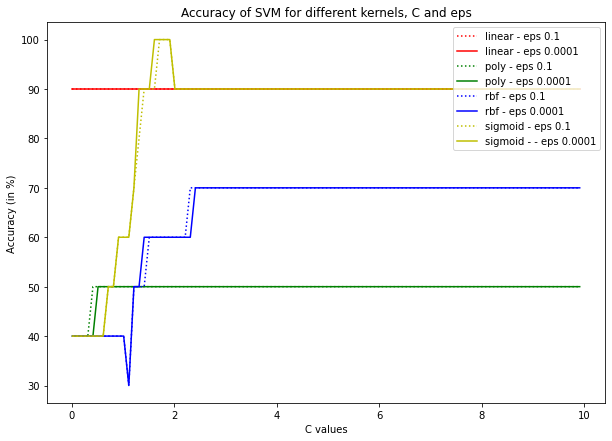

In [105]:
from sklearn.svm import SVC

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
legend = ['linear - eps 0.1', 'linear - eps 0.0001', 'poly - eps 0.1', 'poly - eps 0.0001', 'rbf - eps 0.1', 'rbf - eps 0.0001', 'sigmoid - eps 0.1', 'sigmoid - - eps 0.0001']
color = ['r', 'g', 'b', 'y']
C_val = [x/100 for x in range(1, 1000,10)]
y_test = get_labels(labels_test)

for i in range(len(kernel)):
    for tol in range(1,1002, 1000):
        accuracy = []
        for C in range(1,1000,10):
            clf = SVC(kernel = kernel[i], C = C/100, tol = 1/(tol*10))
            clf.fit(P,y)
            pred = clf.predict(P_test)
            acc = 0
            for j in range(len(y_test)):
                if y_test[j] == pred[j]:
                    acc+= 1
            accuracy.append(acc/len(y_test)*100)
            
        if tol == 1:
            plt.plot(C_val, accuracy, c = color[i], linestyle = 'dotted')
        else:
            plt.plot(C_val, accuracy, c = color[i])
        
plt.legend(legend, loc ="upper right")
plt.xlabel('C values')
plt.ylabel('Accuracy (in %)')
plt.title('Accuracy of SVM for different kernels, C and eps')
plt.rcParams['figure.figsize'] = [10, 7]
plt.show()

### Performance Comparison

#### Kernel 

Based on the classification accuracy on test data - sigmoid kernel performs better than the rest,  
followed by 'linear kernel',     
which is followed by 'rbf' and    
'polynomial kernel' with worst performance. 

#### C 

C values in the the range 1.5 to 4 performs better than other values of C

#### eps

The eps with lesser value performs better

## Question 4) b) 

### Comparison of SVM with LDA

In [106]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 1)

projected_data_train = lda.fit_transform(P,y)

##### The K-Dimesnional data points from PCA are projected onto a 1-Dimensional vector using LDA

In [107]:
pred_lda = lda.predict(P_test)

acc = 0
for j in range(len(y_test)):
    if y_test[j] == pred_lda[j]:
        acc+= 1
        
print(acc/len(y_test)*100)

40.0


### Comparison - Linear SVM and LDA

For higher values of K from 18 to 20 - 
    SVM performs much better than LDA (90% accuracy compared to 40-50% accuracy for LDA)
    
For rest of the values of K -
    Both LDA and SVM perform equally better with 80 - 90% accuracy